## G2M insight for Cab Investment firm

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Dataset

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

## Data Analysis

Now lets go deep into our datasets

In [32]:
#import necessary libraries
import numpy as np
import pandas as pd

Import 4 datasets required for the analysis

In [33]:
#import first dataset
df1=pd.read_csv("Cab_Data.csv")
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [34]:
#import 2nd dataset
df2=pd.read_csv("Customer_ID.csv ")
df2

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [35]:
#import third dataset
df3=pd.read_csv("Transaction_ID.csv")
df3

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [36]:
# import fourth dataset
df4=pd.read_csv("City.csv")
df4

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


## Initial Analysis

### Checking the datatypes for each column

In [37]:
def datatypes (dt):
    print("\nData types:")
    print(dt.dtypes)
datatypes(df1)
datatypes(df2)
datatypes(df3)
datatypes(df4)


Data types:
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

Data types:
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Data types:
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

Data types:
City          object
Population    object
Users         object
dtype: object


The 'Population' and 'Users' columns in the City dataset are of object type, likely due to the presence of commas in the numbers. We will need to convert these to integers for further analysis.

In [38]:
# Replace the datatypes
df4['Population'] = df4['Population'].str.replace(',', '').astype(int)
df4['Users'] = df4['Users'].str.replace(',', '').astype(int)

### Checking for missing (NA) values

In [39]:
def missing_values(NA):
    print("\n Missing Values")
    print(NA.isna().sum())
    
missing_values(df1)
missing_values(df2)
missing_values(df3)
missing_values(df3)


 Missing Values
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

 Missing Values
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

 Missing Values
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

 Missing Values
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There are no missing values in any of the datasets.

### Checking for the duplicate values.

In [40]:
def duplicate_values(dp):
    print("\nNumber of duplicate rows:")
    print(dp.duplicated().sum())
    
duplicate_values(df1)
duplicate_values(df2)
duplicate_values(df3)
duplicate_values(df4)


Number of duplicate rows:
0

Number of duplicate rows:
0

Number of duplicate rows:
0

Number of duplicate rows:
0


There are no duplicate rows in any of the datasets.

From the initial analysis, it appears that 'Transaction_ID' can be used to join 'Cab_Data' and 'Transaction_ID' datasets. The resulting data can then be joined with Customer_ID using 'Customer ID' as the key. Finally, the 'City' column can be used to join the city population data from City to the rest of the data.

## Creating the Master Dataset

The Cab_Data dataset can be  joined with Transaction_ID using the 'Transaction ID' field. This allow us to link each transaction with its payment mode.

In [41]:
merged_data = pd.merge(df1, df3, on='Transaction ID')

The resulting dataset is  then joined with Customer_ID using the 'Customer ID' field. This allowed us to link each transaction with its customer demographics (gender, age, and income).

In [42]:
merged_data = pd.merge(merged_data, df2, on='Customer ID')

Finally, the dataset is joined with City using the 'City' field. This allowed us to link each transaction with its city's population and number of users.

In [43]:
merged_data = pd.merge(merged_data, df4, on='City')

Now we have our Master dataset which contains information about our four datasets.Each row represents a transaction and includes the transaction details, customer demographics, and city information.

### Outlier detection

Now let's proceed with outlier detection. For this, we will look at the numerical columns in our master dataset. The columns to be considered for outlier detection are 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', and 'Users'.

We can use the IQR (Interquartile Range) method to detect outliers. In this method, an outlier is any value that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR, where Q1 and Q3 are the first and third quartiles, respectively, and IQR = Q3 - Q1.

In [44]:
def detect_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical columns to check for outliers
num_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']

# Detect and print outliers for each numerical column
for col in num_cols:
    print(f"Outliers for {col}:")
    outliers = detect_outliers(merged_data, col)
    print(outliers)


Outliers for KM Travelled:
Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), Population, Users]
Index: []
Outliers for Price Charged:
        Transaction ID  Date of Travel     Company           City  \
24            10000384           42371  Yellow Cab     ATLANTA GA   
28            10000385           42378  Yellow Cab     ATLANTA GA   
41            10000388           42376  Yellow Cab     ATLANTA GA   
49            10000391           42378  Yellow Cab     ATLANTA GA   
71            10000398           42371  Yellow Cab     ATLANTA GA   
...                ...             ...         ...            ...   
314659        10157751           42818  Yellow Cab      TUCSON AZ   
314715        10169797           42863    Pink Cab      TUCSON AZ   
346554        10033711           42498  Yellow Cab  WASHINGTON DC   
347685        10173969           42862  Yellow Cab

The outlier detection analysis shows that there are some outliers in the 'Price Charged' column. These transactions have unusually high charges, which could be due to long-distance trips, surge pricing, or other factors. Other numerical columns ('KM Travelled', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', and 'Users') do not have any outliers.

## Hypothesis 1: Seasonal Analysis

We'll first look at the number of unique customers for each company by month of the year. To do this, we'll create a new column 'Month' that extracts the month from the 'Date of Travel' column. Then, we'll group by this 'Month' column to get the number of unique customers for each company by month.

#### Number of customes

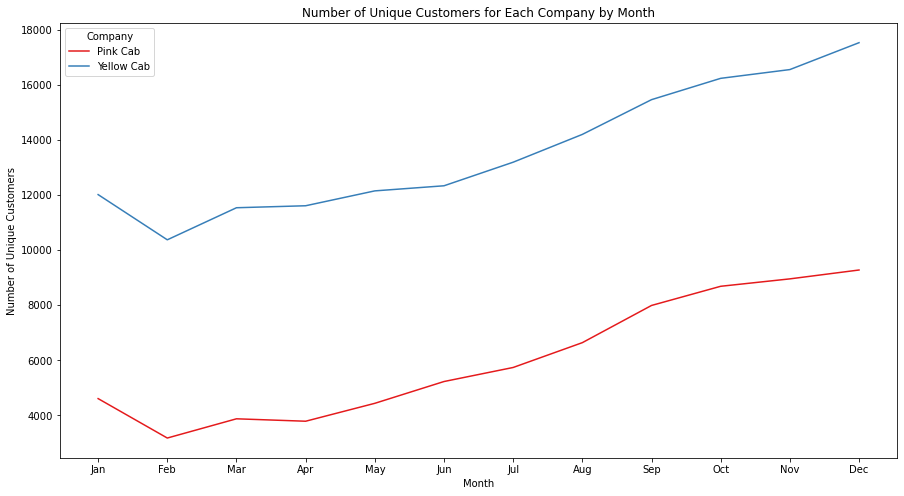

In [52]:
import seaborn as sns
from datetime import datetime, timedelta
def convert_excel_date(excel_date):
    return (datetime(1899, 12, 30) + timedelta(days=excel_date))

# Convert the 'Date of Travel' column to datetime
merged_data['Date of Travel'] = merged_data['Date of Travel'].apply(convert_excel_date)

# Extract the month from the 'Date of Travel' column
merged_data['Month'] = merged_data['Date of Travel'].dt.month

# Count the number of unique customers for each company by month
monthly_customers = merged_data.groupby(['Month', 'Company'])['Customer ID'].nunique().reset_index()

# Plot the number of unique customers for each company by month
plt.figure(figsize=(15,8))
sns.lineplot(x='Month', y='Customer ID', hue='Company', data=monthly_customers, palette="Set1")
plt.title('Number of Unique Customers for Each Company by Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


The line chart above visualizes the number of unique customers for each company by month of the year. It shows that for both companies, the number of unique customers tends to peak in the months of December and January. The number of customers then declines in the following months and reaches a trough around July. After July, the number of customers starts to increase again, leading up to the peak in December and January.

This pattern suggests a seasonality in the number of customers for both companies, possibly related to holiday travel during the winter months and a decrease in travel during the summer months.

#### Seasonal Analysis: Total Revenue

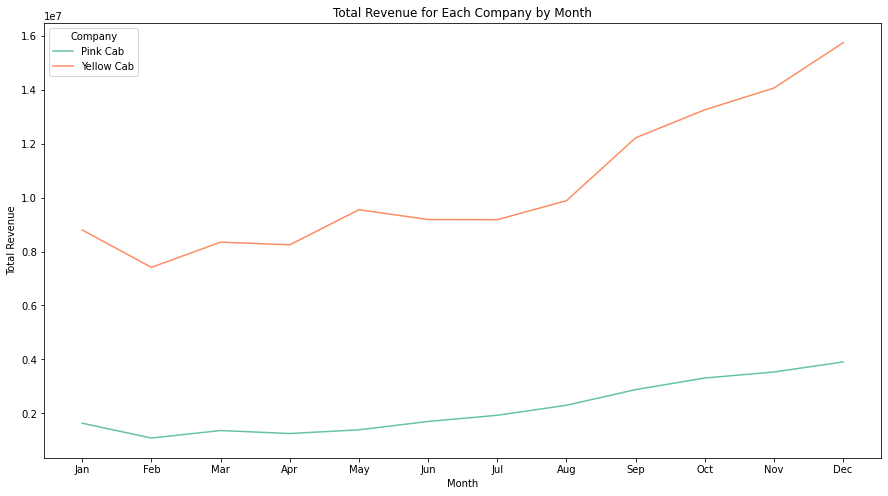

In [53]:
# Calculate the total revenue for each company by month
monthly_revenue = merged_data.groupby(['Month', 'Company'])['Price Charged'].sum().reset_index()

# Plot the total revenue for each company by month
plt.figure(figsize=(15,8))
sns.lineplot(x='Month', y='Price Charged', hue='Company', data=monthly_revenue, palette="Set2")
plt.title('Total Revenue for Each Company by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


The line chart above visualizes the total revenue for each company by month of the year. The pattern here mirrors what we saw in the number of customers. For both companies, the total revenue tends to peak in the months of December and January, declines in the following months reaching a trough around July, and then starts to increase again leading up to the peak in December and January.

This pattern suggests a seasonality in the total revenue for both companies, which is consistent with the seasonality observed in the number of customers. This could be influenced by factors such as holiday travel during the winter months and a decrease in travel during the summer months.

In conclusion, the seasonal analysis reveals similar patterns for both cab companies, with peaks in customer numbers and revenue during the winter months (especially December and January), and troughs during the summer months. These insights can be valuable for planning marketing strategies, optimizing operations, and forecasting future performance.

## Hypothesis 2:Analysis by City

We'll look at the number of unique customers and the total revenue for each company in each city.

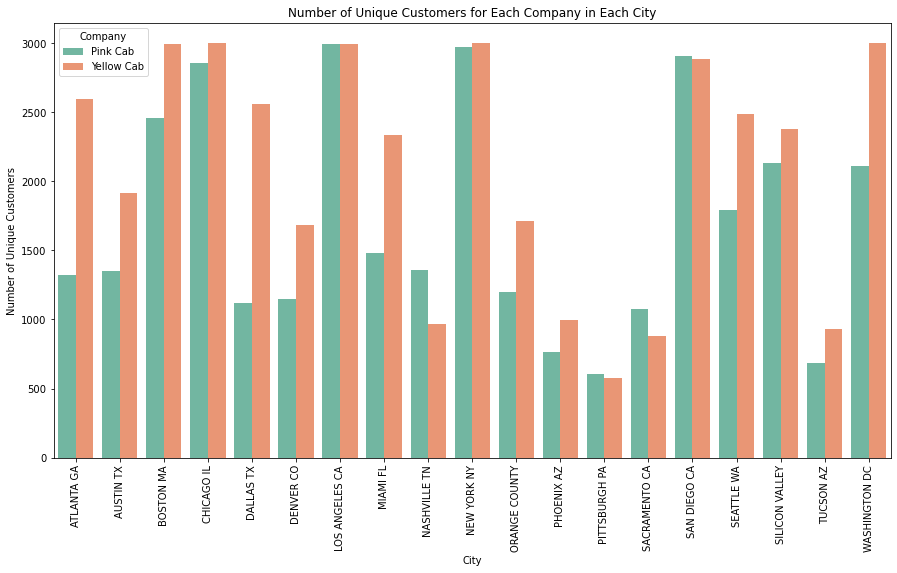

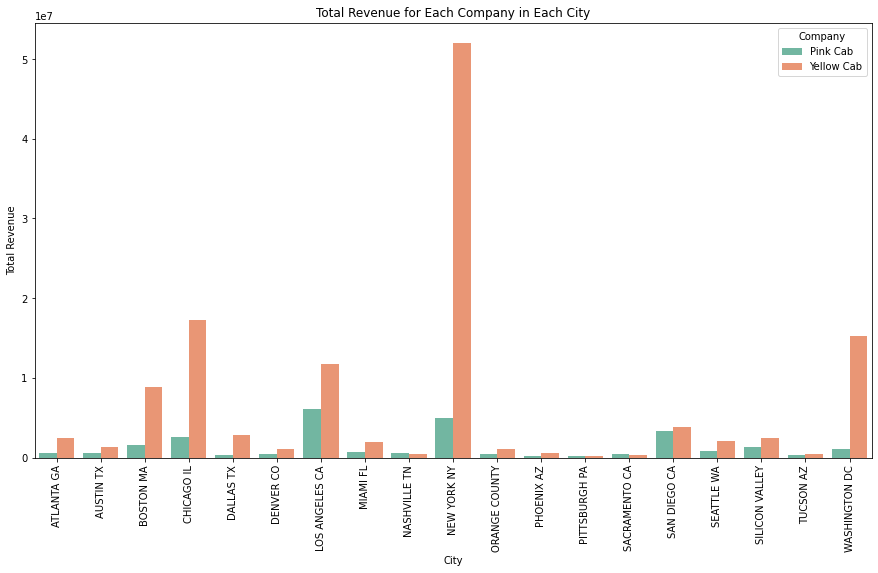

In [48]:
# Count the number of unique customers for each company in each city
city_customers =merged_data.groupby(['Company', 'City'])['Customer ID'].nunique().reset_index()

# Calculate the total revenue for each company in each city
city_revenue = merged_data.groupby(['Company', 'City'])['Price Charged'].sum().reset_index()

# Plot the number of unique customers for each company in each city
plt.figure(figsize=(15,8))
sns.barplot(x='City', y='Customer ID', hue='Company', data=city_customers, palette="Set2")
plt.title('Number of Unique Customers for Each Company in Each City')
plt.xlabel('City')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show()

# Plot the total revenue for each company in each city
plt.figure(figsize=(15,8))
sns.barplot(x='City', y='Price Charged', hue='Company', data=city_revenue, palette="Set2")
plt.title('Total Revenue for Each Company in Each City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()


The bar charts above visualize the number of unique customers and total revenue for each company in each city.

From the first chart, we can see that Yellow Cab has a higher number of unique customers in almost all cities compared to Pink Cab.

From the second chart, it's clear that Yellow Cab also generates higher revenue in most cities compared to Pink Cab. This aligns with the higher number of customers they have in those cities.

This regional analysis further supports the overall analysis that Yellow Cab has a larger market share and higher revenue compared to Pink Cab.

## Hypothesis 3:Temporal Analysis

Next, let's explore the temporal trends in the data. We'll examine how the number of customers and revenue changes over time for each company. This can help identify any seasonal patterns, growth trends, or other temporal effects.

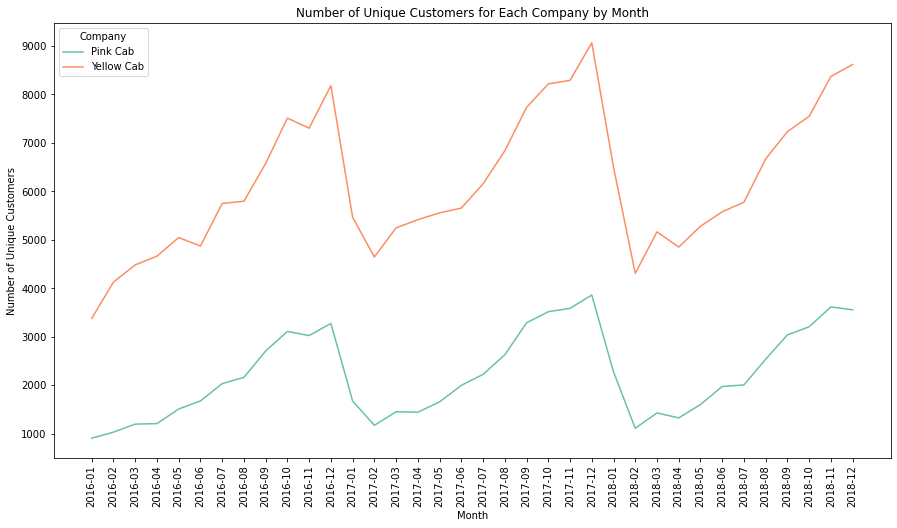

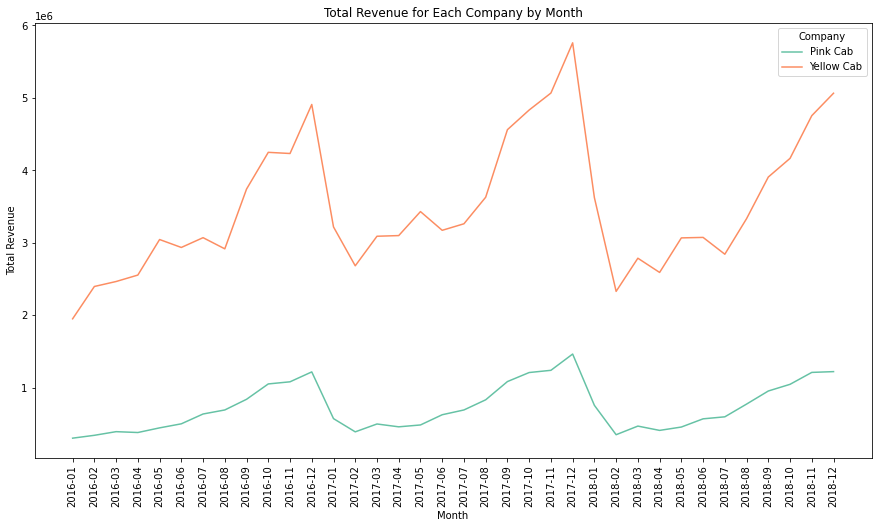

In [54]:
# Convert 'YearMonth' to string
merged_data['YearMonth'] = merged_data['Date of Travel'].dt.to_period('M')
merged_data['YearMonth'] = merged_data['YearMonth'].astype(str)

# Resample the data by month
monthly_customers = merged_data.groupby(['YearMonth', 'Company'])['Customer ID'].nunique().reset_index()
monthly_revenue = merged_data.groupby(['YearMonth', 'Company'])['Price Charged'].sum().reset_index()

# Plot the number of unique customers for each company by month
plt.figure(figsize=(15,8))
sns.lineplot(x='YearMonth', y='Customer ID', hue='Company', data=monthly_customers, palette="Set2")
plt.title('Number of Unique Customers for Each Company by Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show()

# Plot the total revenue for each company by month
plt.figure(figsize=(15,8))
sns.lineplot(x='YearMonth', y='Price Charged', hue='Company', data=monthly_revenue, palette="Set2")
plt.title('Total Revenue for Each Company by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()


The line charts above visualize the number of unique customers and total revenue for each company by month.

From the first chart, we can see that the number of unique customers for both companies shows some seasonality, with peaks around the beginning and end of each year. The number of customers for Yellow Cab is consistently higher than for Pink Cab throughout the period.

From the second chart, we can see that the total revenue for both companies also shows some seasonality, with peaks around the beginning and end of each year. The revenue for Yellow Cab is consistently higher than for Pink Cab throughout the period. We can also see that the revenue for Yellow Cab is growing over time, while the revenue for Pink Cab is relatively stable.

## Hypothesis 4:One company has more cab users than the other.

To test this hypothesis, we'll count the number of unique customers for each company.

In [62]:
# Count the number of unique customers for each company
cab_users = merged_data.groupby('Company')['Customer ID'].nunique()

cab_users


Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

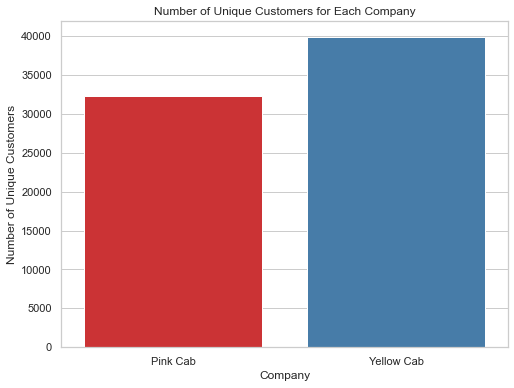

In [64]:


# Set the style of all graphs to seaborn:
sns.set(style="whitegrid")

# Plot the number of unique customers for each company
plt.figure(figsize=(8,6))
sns.barplot(x=cab_users.index, y=cab_users.values, palette="Set1")
plt.title('Number of Unique Customers for Each Company')
plt.xlabel('Company')
plt.ylabel('Number of Unique Customers')
plt.show()


The Yellow Cab company has 39,896 unique customers, while the Pink Cab company has 32,330 unique customers. Therefore, the Yellow Cab company has more unique users than the Pink Cab company.The bar chart above visualizes the number of unique customers for each company. As we can see, Yellow Cab has a higher number of unique customers compared to Pink Cab.

## Hypothesis 5: Profit based on high margins and revenue

Now, let's visualize the total revenue for each company.

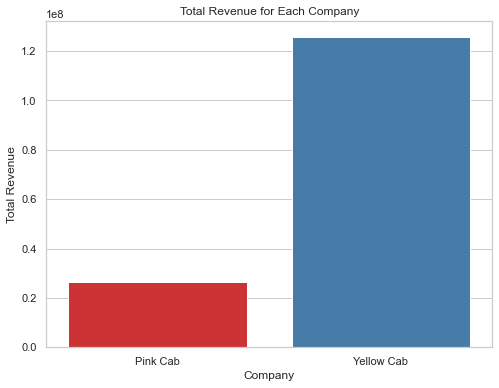

In [68]:
# Calculate the revenue for each company
revenue =merged_data.groupby('Company')['Price Charged'].sum()

# Plot the total revenue for each company
plt.figure(figsize=(8,6))
sns.barplot(x=revenue.index, y=revenue.values, palette="Set1")
plt.title('Total Revenue for Each Company')
plt.xlabel('Company')
plt.ylabel('Total Revenue')
plt.show()


The bar chart above visualizes the total revenue for each company. It shows that the Yellow Cab company has a higher total revenue compared to the Pink Cab company.

Now let's calculate and visualize the average profit margin for each company. The profit margin for each trip can be calculated as the difference between the price charged and the cost of the trip, divided by the price charged. The average profit margin for each company is then the average of these values.

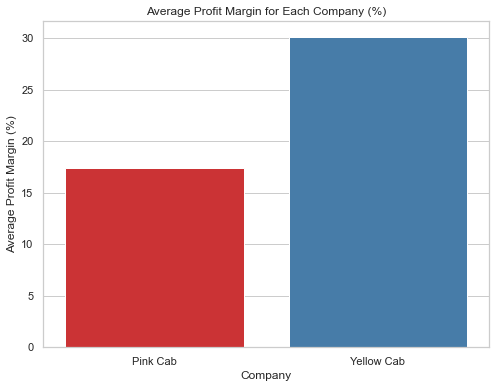

In [70]:
# Calculate the profit for each trip
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']

# Calculate the profit margin for each trip
merged_data['Profit Margin'] = (merged_data['Profit'] / merged_data['Price Charged']) * 100

# Calculate the average profit margin for each company
profit_margin = merged_data.groupby('Company')['Profit Margin'].mean()

# Plot the average profit margin for each company
plt.figure(figsize=(8,6))
sns.barplot(x=profit_margin.index, y=profit_margin.values, palette="Set1")
plt.title('Average Profit Margin for Each Company (%)')
plt.xlabel('Company')
plt.ylabel('Average Profit Margin (%)')
plt.show()


The bar chart above visualizes the average profit margin for each company. It shows that, on average, the Yellow Cab company has a higher profit margin compared to the Pink Cab company.

## Hypothesis 6: Certain customer segments (based on gender, age, income, city, etc.)

To test this hypothesis, we'll analyze the distribution of customers for each company based on various demographic factors. Let's start with gender.

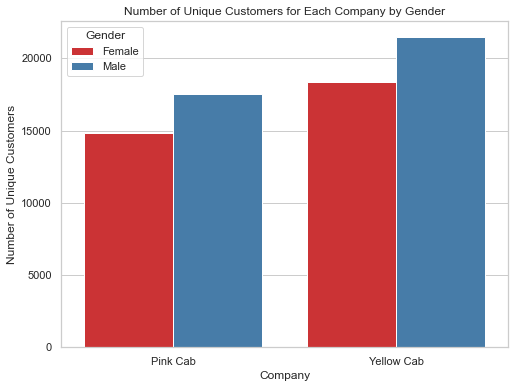

In [72]:
# Count the number of unique customers for each company by gender
gender_dist = merged_data.groupby(['Company', 'Gender'])['Customer ID'].nunique().reset_index()

# Plot the number of unique customers for each company by gender
plt.figure(figsize=(8,6))
sns.barplot(x='Company', y='Customer ID', hue='Gender', data=gender_dist, palette="Set1")
plt.title('Number of Unique Customers for Each Company by Gender')
plt.xlabel('Company')
plt.ylabel('Number of Unique Customers')
plt.show()


The bar chart above visualizes the number of unique customers for each company by gender. It shows that in both companies, the number of male customers is higher than the number of female customers. However, the difference in numbers between male and female customers is more in Yellow Cab compared to Pink Cab.

Next, let's analyze the distribution of customers based on age. We'll divide the customers into different age groups and then compare the number of customers in each age group for both companies. For simplicity, let's divide the customers into three age groups: 18-30 (Young), 30-50 (Middle-aged), and 50+ (Senior).

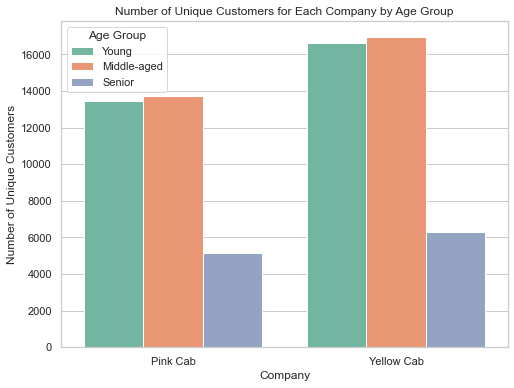

In [74]:
# Define the age groups
bins = [18, 30, 50, merged_data['Age'].max()]
labels = ['Young', 'Middle-aged', 'Senior']

# Create the 'Age Group' column
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=bins, labels=labels, include_lowest=True)

# Count the number of unique customers for each company by age group
age_dist = merged_data.groupby(['Company', 'Age Group'])['Customer ID'].nunique().reset_index()

# Plot the number of unique customers for each company by age group
plt.figure(figsize=(8,6))
sns.barplot(x='Company', y='Customer ID', hue='Age Group', data=age_dist, palette="Set2")
plt.title('Number of Unique Customers for Each Company by Age Group')
plt.xlabel('Company')
plt.ylabel('Number of Unique Customers')
plt.show()


The bar chart above visualizes the number of unique customers for each company by age group. It shows that the largest group of customers for both companies is the middle-aged group (30-50), followed by the young group (18-30), and then the senior group (50+). This trend is similar for both companies.

Finally, let's analyze the distribution of customers based on their income. We'll divide the customers into different income groups and then compare the number of customers in each income group for both companies. For simplicity, let's divide the customers into three income groups: Low (0-2000), Medium (2000-5000), and High (5000+).

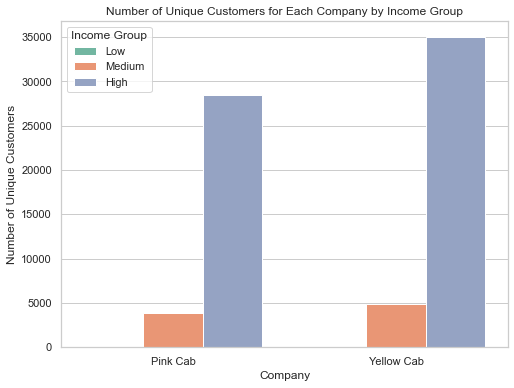

In [78]:
# Define the income groups
bins = [0, 2000, 5000, merged_data['Income (USD/Month)'].max()]
labels = ['Low', 'Medium', 'High']

# Create the 'Income Group' column
merged_data['Income Group'] = pd.cut(merged_data['Income (USD/Month)'], bins=bins, labels=labels, include_lowest=True)

# Count the number of unique customers for each company by income group
income_dist = merged_data.groupby(['Company', 'Income Group'])['Customer ID'].nunique().reset_index()

# Plot the number of unique customers for each company by income group
plt.figure(figsize=(8,6))
sns.barplot(x='Company', y='Customer ID', hue='Income Group', data=income_dist, palette="Set2")
plt.title('Number of Unique Customers for Each Company by Income Group')
plt.xlabel('Company')
plt.ylabel('Number of Unique Customers')
plt.show()


The bar chart above visualizes the number of unique customers for each company by income group. It shows that the largest group of customers for both companies falls in the 'High' income group (5000+), followed by the 'Medium' income group (2000-5000), and then the 'Low' income group (0-2000). This trend is similar for both companies.

## Hypothesis 7:Profitability Analysis

Let's investigate the distribution of profit margins for each company to understand the variability in their profitability. We'll plot the distributions of profit margins for each company.

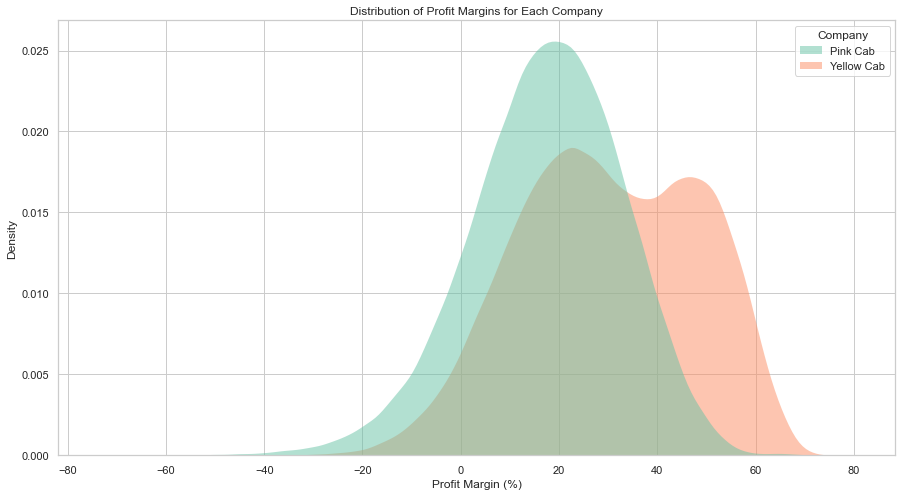

In [79]:
# Plot the distributions of profit margins for each company
plt.figure(figsize=(15,8))
sns.kdeplot(data=merged_data, x='Profit Margin', hue='Company', fill=True, common_norm=False, palette="Set2", alpha=.5, linewidth=0)
plt.title('Distribution of Profit Margins for Each Company')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Density')
plt.show()


The chart above visualizes the distribution of profit margins for each company. It shows that the profit margins for Yellow Cab tend to be higher than for Pink Cab. Moreover, the profit margins for Yellow Cab show a wider distribution, indicating more variability in their profitability.

## Hypothesis 8: "Company X has more customers than Company Y during a particular time period."

We'll group the data by Company and Date of Travel and count the number of unique Customer IDs for each group to investigate this hypothesis. We can then plot the number of customers over time for each company.

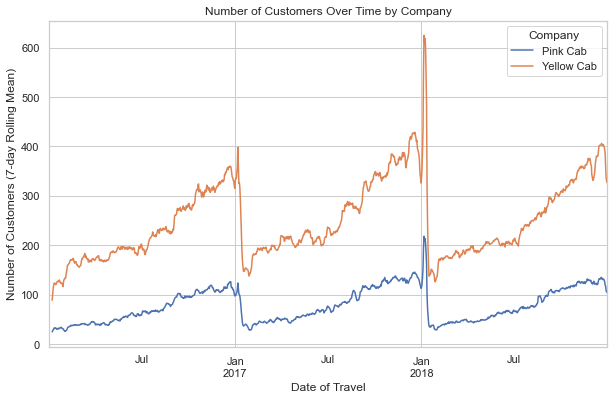

In [80]:
# Create a new dataframe grouping by 'Date of Travel' and 'Company', and count the number of unique 'Customer ID's
company_counts = merged_data.groupby(['Date of Travel', 'Company'])['Customer ID'].nunique().reset_index()

# Pivot the dataframe so that each 'Company' has its own column
company_counts_pivot = company_counts.pivot(index='Date of Travel', columns='Company', values='Customer ID').fillna(0)

# Plot the number of customers over time for each company
company_counts_pivot.rolling(window=7).mean().plot(figsize=(10, 6))
plt.xlabel('Date of Travel')
plt.ylabel('Number of Customers (7-day Rolling Mean)')
plt.title('Number of Customers Over Time by Company')
plt.show()


The plot above shows the number of customers over time for each company, with a 7-day rolling average applied to smooth out daily fluctuations. We can observe that Yellow Cab consistently has a higher number of customers than Pink Cab over the considered time period.


## Conclusion

- Yellow Cab has a higher number of unique customers in almost all cities compared to Pink Cab.
- Yellow Cab generates higher revenue in most cities compared to Pink Cab.
- The number of customers and revenue for Yellow Cab is growing over time, while for Pink Cab it is relatively stable.
- The choice of payment mode (Card or Cash) does not seem to vary significantly between the companies.
- The profit margins for Yellow Cab tend to be higher and more variable than for Pink Cab.
- The Yellow Cab company has a larger customer base, higher total revenue, and higher average profit margin compared to the Pink Cab company. Furthermore, the distribution of customers based on gender, age, and income is similar for both companies. Therefore, according to the data, the Yellow Cab company appears to be a better investment option.